

#### Resumen previo:
En este notebook resuelvo con $f=0$ la ecuación no lineal para el factor conforme. Busco un factor conforme con los comportamientos deseados, le doy materia tal que satisfaga la ecuación y resuelvo numericamente a ver con que me encuentro 

## Ecuaciones en cilindricas 1D
En este notebook testeo mi problema del Proyecto 1 en coordenadas cilindricas pero en dim 1 ie tengo las ecuaciones. Para la función asociada a la curvatura extrinseca tenemos
\begin{equation}
\partial_{\rho} ^2 f +\frac{3}{\rho} \partial_{\rho} f =\Delta f +\frac{2}{\rho}\partial_{\rho} f=-8\pi \alpha
\end{equation}
Condiciones de borde $$\partial_{\rho} f |_{\rho=0}=0$$ $$\partial_{\rho}f +\frac{f}{\rho}|_{\rho=L}=0$$ Y para el factor conforme tenemos

\begin{equation}
\Delta \psi + \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }=0=\frac{1}{\rho} \partial_{\rho}(\rho \partial_{\rho}\psi)+  \frac{2\pi \alpha \rho}{ \psi ^3}+\frac{| \partial f|^2 \rho^2}{4 \psi ^7 }
\end{equation}
Condiciones de borde $$\partial_{\rho} \psi |_{\rho=0}=0$$ $$\partial_{\rho}\psi+\frac{\psi -1}{\rho}|_{\rho=L}=0$$





In [1]:
Atom = false
#Atom = true

false

In [3]:
using Gridap
using GridapODEs
if  Atom == false
    using GridapMakie, GLMakie
end
using FileIO
using GridapGmsh
using gmsh

In [4]:
L = 80.
model = GmshDiscreteModel("modelos/1D80.msh")

Info    : Reading 'modelos/1D80.msh'...
Info    : 3 entities
Info    : 3201 nodes
Info    : 3202 elements
Info    : Done reading 'modelos/1D80.msh'


UnstructuredDiscreteModel()

In [5]:
Ω = Triangulation(model)
degree = 3
dΩ = Measure(Ω,degree)

Measure()

┌ Info: Precompiling PNGFiles [f57f5aa1-a3ce-4bc8-8ab9-96f992907883]
└ @ Base loading.jl:1423


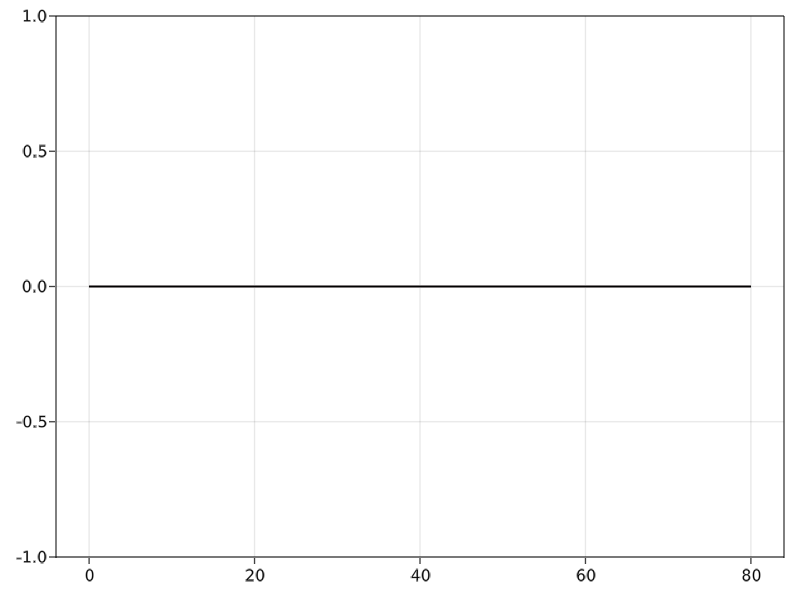

In [6]:
if Atom == false 
    fig, ax = plot(Ω)
    #scatter!(Ω, marker=:star8, markersize=4, color=:blue)
    wireframe!(Ω, color=:black, linewidth=2)
    fig
end

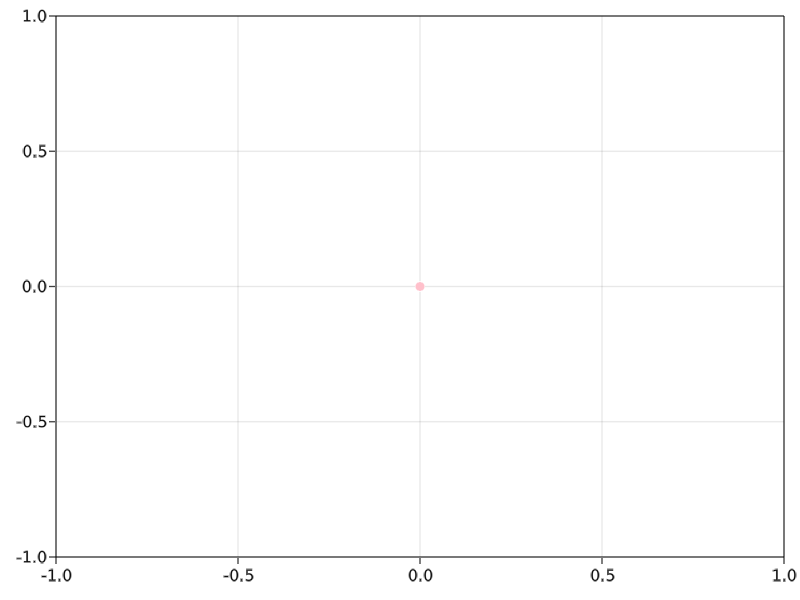

In [7]:
neumanntags_L= ["L"]
Γ_L = BoundaryTriangulation(model,tags=neumanntags_L)
dΓ_L = Measure(Γ_L,degree)
if Atom == false 
    fig = plot(Γ_L, linewidth=8
    #, shading=true
    )
end

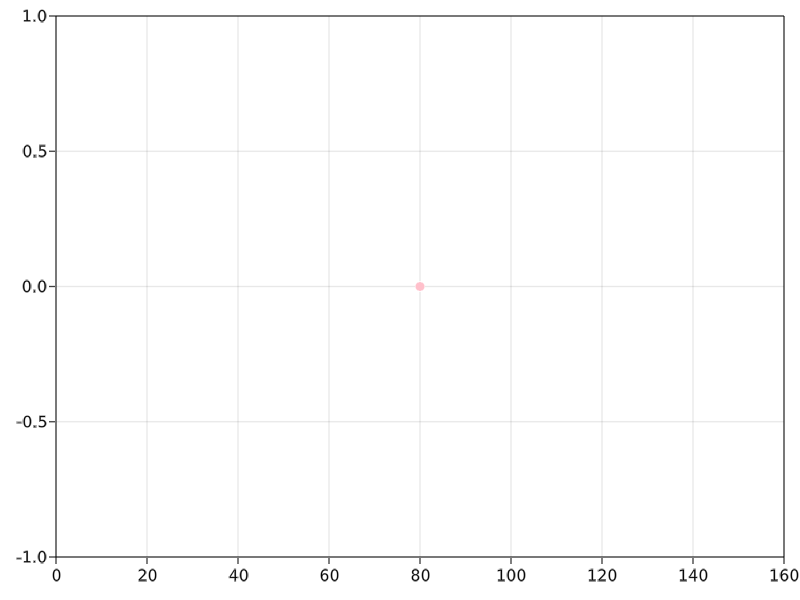

In [8]:
neumanntags_R= ["R"]
Γ_R = BoundaryTriangulation(model,tags=neumanntags_R)
dΓ_R = Measure(Γ_R,degree)
if Atom == false 
    fig = plot(Γ_R, linewidth=8
    #, shading=true
    )
end

In [9]:
order = 2
reffe = ReferenceFE(lagrangian,Float64,order)
V = TestFESpace(model,reffe,conformity=:H1)
U = TrialFESpace(V)

UnconstrainedFESpace()

InterruptException:
Stacktrace:
  [1] poptask(W::Base.InvasiveLinkedListSynchronized{Task})
    @ Base ./task.jl:862
  [2] wait()
    @ Base ./task.jl:871
  [3] wait(c::Base.GenericCondition{Base.Threads.SpinLock})
    @ Base ./condition.jl:123
  [4] _trywait(t::Timer)
    @ Base ./asyncevent.jl:130
  [5] wait
    @ ./asyncevent.jl:147 [inlined]
  [6] sleep(sec::Float64)
    @ Base ./asyncevent.jl:232
  [7] fps_renderloop(screen::GLMakie.Screen, framerate::Float64)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:32
  [8] renderloop(screen::GLMakie.Screen; framerate::Float64)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:48
  [9] renderloop(screen::GLMakie.Screen)
    @ GLMakie ~/.julia/packages/GLMakie/lcQNS/src/rendering.jl:41
 [10] (::GLMakie.var"#50#52"{GLMakie.Screen})()
    @ GLMakie ./task.jl:429


Hasta acá cargamos grilla, bordes, espacios funcionales. La grilla 1D es de $[0,80]$

## Primera parte: $f=0$, factor conforme propuesto

Lo primero que buscamos hacer es comprender bien el rol que tiene cada término de la ecuación. Para ello comienzo con la ecuación para el factor conforme, quitando el término asociado a $f$, es decir la ecuación

$$\frac{1}{\rho} \partial_{\rho}(\rho \partial_{\rho}\psi)+ \frac{2\pi \alpha \rho}{ \psi ^3}=0$$
Condiciones de borde $$\partial_{\rho} \psi |_{\rho=0}=0$$ $$\partial_{\rho}\psi+\frac{\psi -1}{\rho}|_{\rho=L}=0$$
Linealizando la ecuación y en su formulación dél tenemos
$$\int_{\Omega}(-\rho \partial_{\rho}w \partial_{\rho}\psi_0 -\rho \partial_{\rho}w \partial_{\rho}\psi_1 + \frac{2\pi \alpha \rho^2 w}{ \psi_0 ^3} -\frac{6\pi \alpha \rho^2 w \psi_1}{ \psi_0 ^4})d\rho + \int_{\Gamma_L}(\rho w (\partial_{ \rho} \psi)|_{\rho=0}) +\int_{\Gamma_R}(\rho w (\partial_{ \rho} \psi)|_{\rho=L})$$ Donde 

$$(\partial_{ \rho} \psi)|_{\rho=L} = - \frac{\psi -1}{\rho} |_{\rho=L} $$ implica $$(\partial_{ \rho} \psi_0)|_{\rho=L} = - \frac{\psi_0 -1}{\rho} |_{\rho=L}$$ y $$(\partial_{ \rho} \psi_1)|_{\rho=L} = - \frac{\psi_1}{\rho} |_{\rho=L}$$

Y por otro lado $$\partial_{\rho} \psi |_{\rho=0}=0$$ implica que 
$$\partial_{\rho} \psi_0 +\partial_{\rho} \psi_1 |_{\rho=0} =0$$ 
Entonces organizando los términos tenemos la formulación débil de la ecuación
$$\text{Res}(\psi_0,w)=\int_{\Omega}(-\rho \partial_{\rho}w \partial_{\rho}\psi_0+ \frac{2\pi \alpha \rho^2 w}{ \psi_0 ^3} + \int_{\Gamma_L}(\rho w (\partial_{ \rho} \psi_0)|_{\rho=0}) +\int_{\Gamma_R}(-  w   (\psi_0 -1)) $$
$$\text{Jac}(\psi_0,\psi_1,w)=\int_{\Omega}( -\rho \partial_{\rho}w \partial_{\rho}\psi_1  -\frac{6\pi \alpha \rho^2 w \psi_1}{ \psi_0 ^4})d\rho + \int_{\Gamma_L}(\rho w (\partial_{ \rho} \psi_1)|_{\rho=0}) +\int_{\Gamma_R}(-  w  \psi_1) $$

La estrategia para resolver la ecuación reducida es primero proponer una $\psi$ que tenga los comportamientos deseados y dada la misma, obtener $a$. Con la misma resolver la ecuación linealizada numericamente en su formulación débil, de esta forma ya sabemos que deberíamos obtener y estudiamos su comportamiento.

Proponemos un factor conforme de la forma 
$$ \psi(\rho) = \frac{\rho^3 +A\rho^2}{\rho^3 +1}$$ 
El cual satisface Neuman homogeneo en el origen y el limite de $\rho \to \infty$ es 1


La constante $A$ es elegida
$$A=\frac{1 - 2L^3}{3L^2}$$ tal que satisfaga Robin en $\rho=L$ o bien si $A=1$ agregamos una fuente a la condición de borde de Robin, dado por la variable dependiente de $A$ y $L$,  $f_{robin}$.

$$f_{robin}= \frac{3AL^2+2L^3-1}{L(1+L^3)^2}$$

In [9]:
A= 1.#(1. - 2. *L^3)/(3. *L^2)

1.0

In [10]:
f_robin=(  3. *A *L^2+ 2. * L^3-1. )/(L*(1. +L^3)^2)

4.9743410349647745e-8

In [11]:
ψ_p(x)=((x[1]^3  +A *x[1]^2 ) /(1. +x[1]^3) ) 

ψ_p (generic function with 1 method)

Notemos que dado $\psi$ tenemos 
$$a=-\frac{\psi^3 \Delta \psi}{2\pi\rho}$$

In [12]:
Lap_ψ_p(x)=((- 5. *A * x[1]^4 +4. *A*x[1]+ 9. *x[1]^2)*(1. +x[1]^6 +2. *x[1]^3) - 6. *x[1]^2 *(x[1]^3 +1.)*(-A * x[1]^5 + 2. *A*x[1]^2 +3. * x[1]^3) )/(( 1. +x[1]^3 )^4)

Lap_ψ_p (generic function with 1 method)

In [13]:
a(x)= -(1. /(2. * π * x[1]^2)) *(ψ_p(x))^3  *Lap_ψ_p(x)

a (generic function with 1 method)

In [14]:
x = range(0., L, length=1000)
lines(x,ψ_p, label= "exact") 

LoadError: UndefVarError: lines not defined

In [15]:
x = range(0.,L, length=1000)
lines(x,a, label= "exact") 

LoadError: UndefVarError: lines not defined

In [16]:
x = range(0.,L, length=1000)
lines(x,Lap_ψ_p, label= "exact") 

LoadError: UndefVarError: lines not defined

In [17]:
function t1(x)
  return 2. * π*a(x)
end

function t2(x)
  return 6. * π*a(x)
end

t2 (generic function with 1 method)

In [18]:
ρ(x)=x[1]
ρvec(x) = VectorValue(1.)

ρvec (generic function with 1 method)

In [19]:
c(x)=0

c (generic function with 1 method)

In [20]:
res0(w,w2)=  ∫(  - (∇(w2) ⋅ ∇(w))*ρ  + t1*( (w2*ρ * ρ)/(w*w*w))  ) *dΩ  +∫( c * w2 *ρ ) *dΓ_L +∫( -w2 * (w- 1.) +w2 *f_robin ) *dΓ_R 

res0 (generic function with 1 method)

In [21]:
jac0(w,dw,w2)= ∫(  - ( ∇(w2) ⋅ ∇(dw))*ρ   - ((dw* w2*ρ * ρ)/(w*w*w*w))*t2  ) *dΩ+∫( -w2 * (dw)  ) *dΓ_R

jac0 (generic function with 1 method)

In [22]:
oppsi0 = FEOperator(res0,jac0,U,V)

LoadError: UndefVarError: U not defined

In [23]:
using LineSearches: BackTracking
nls = NLSolver(
  show_trace=true, method=:newton, linesearch=BackTracking(),ftol=1E-20, xtol= 1E-20)
solver = FESolver(nls)

NonlinearFESolver()

In [24]:
w020=interpolate_everywhere(ψ_p,U)

LoadError: UndefVarError: U not defined

In [25]:
w0, = solve!(w020,solver,oppsi0)

LoadError: UndefVarError: w020 not defined

Visualicemos la solución numerica

In [26]:
x = range(0., L, length=1000)
lines(x, evaluate(w0 ,Gridap.Point.(x)), label= "u")

LoadError: UndefVarError: w0 not defined

dif= w0 -ψ_pEl valor absoluto del error con la solución exacta

In [27]:
dif_cuad= (w0 -ψ_p)*(w0 -ψ_p)

LoadError: UndefVarError: w0 not defined

In [28]:
L2norm_dif_cuad= sqrt(sum( ∫( dif_cuad)*dΩ ))

LoadError: UndefVarError: dif_cuad not defined

In [29]:
x = range(0., L, length=1000)
lines(x, evaluate(w0 -ψ_p,Gridap.Point.(x)), label= "u")

LoadError: UndefVarError: w0 not defined

In [30]:
ρvec(x) = VectorValue(1.)
partialψ0=ρvec ⋅ ∇(w0)
invrho(x)=1. /x[1]

LoadError: UndefVarError: w0 not defined

In [31]:
eq_cuad= (Δ(w0)+invrho *partialψ0 + t1 *(ρ/ (w0*w0*w0)) ) * (Δ(w0)+invrho *partialψ0 + t1 *(ρ/ (w0*w0*w0)) )

LoadError: UndefVarError: w0 not defined

In [32]:
L2norm_eq_quad= sqrt(sum( ∫(eq_cuad )*dΩ ))

LoadError: UndefVarError: eq_cuad not defined

In [33]:
x = range(0., L, length=1000)
lines(x, evaluate(Δ(w0)+invrho *partialψ0 + t1 *(ρ/ (w0*w0*w0)),Gridap.Point.(x)), label= "u")

LoadError: UndefVarError: w0 not defined